# Transforms

## Importing Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets, transforms

## Loading a Dataset

In [2]:
train_datasets = datasets.FashionMNIST(
    root="../data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

test_datasets = datasets.FashionMNIST(
    root="../data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

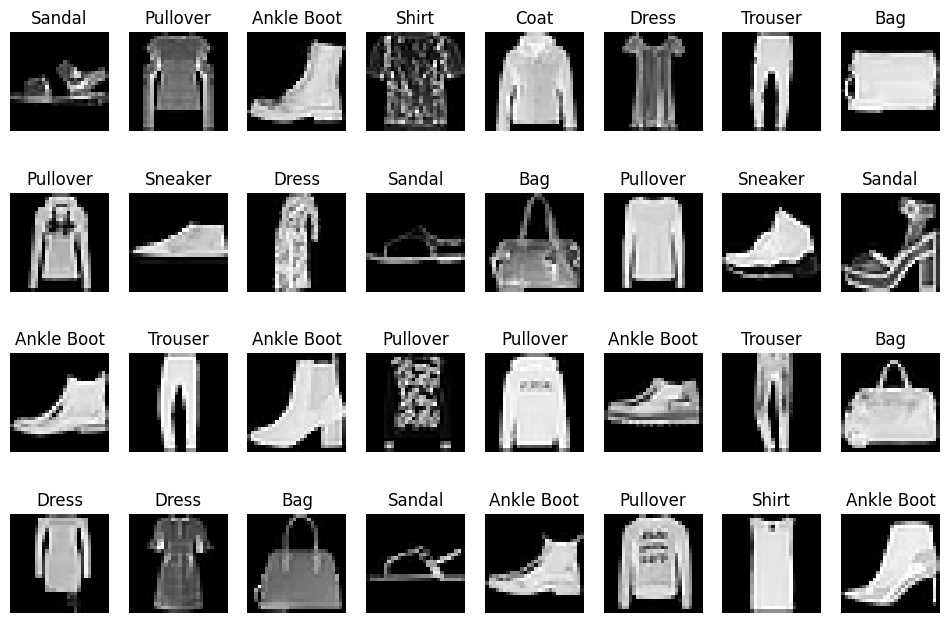

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(12, 8))
cols, rows = 8, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_datasets), size=(1,)).item()
    img, label = train_datasets[sample_idx]
    _, max_idx = torch.max(label, dim=0)
    img = img / 2 + 0.5
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[max_idx.item()])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()